# Model Evaluation

Since our goal is to generalize to unseen data, it's important to understand the impact of evaluating on our training set.

* We tend to overestimate performance
* We can easily get 100% performance on the training set simply by "memorizing it"

Because we talk about how a model is "fit" to a dataset, we call this issue _overfitting_.  That is, we're _too "fit"_ to this one set of data.  So much so, we can't generalize.

This is a consequence of the _bias-variance tradeoff_.

# Bias-Variance Tradeoff

When we evaluate models, two of the most common cases are that we don't match the training data closely _enough_ to be useful _or_ we end up matching it too closely; so closely that the model won't generalize to unseen data.

In cases where we aren't matching closely enough, we say the model has _high bias_.  In cases where the model contorts its view of the world too much we say the model has _high variance_.  

The fact that there's no one right answer is what we call the _bias variance tradeoff (sometimes bias-variance dilemma)_.

Neither of these is perfect.  As practitioners we must experiment to find the best mix of bias and variance in our models.

## Bias-Variance Decomposition

Mathematically, the error of a model is composed of three terms: bias, variance, and an irreducible error, $\sigma$: 

$$error[(y - f(x))^2] = bias[f(x)]^2 + variance[f(x)]^2 + \sigma^2$$

(Note:  Derivation of this is beyond the scope of this class.)

Day to day you may not need the math, but understanding that the mistakes your model makes fall into these three buckets is a valuable troubleshooting approach.

## Example of Overfitting and Underfitting
The following image shows an example of two models on a dataset.  The first is a linear model that can't quite capture the shape of the data (note that the data appear to be more logarithmic in shape)

![high-bias-vs-high-variance.png](high-bias-vs-high-variance.png)

Note that the second image fits _all_ of the training data.  Almost all the samples are accounted for perfectly.  

It would seem to be a perfect fit.

But what happens if we add "unseen data" to the graph.  Points that fall between the samples we have in the graph now?

![high-bias-vs-high-variance-with-unseen.png](high-bias-vs-high-variance-with-unseen.png)

We can now see that this isn't a great model at all.  If we had only evaluated the model on the training data, we wouldn't be able to see that.

Note too that this model is _not_ linear.  A linear model cannot curve.  This is almost a $k$-degree polynomial where $k$ is the number of training samples!  We call a non-linear model a "more complex" model since it can mold to "fit" more complex formations of data.

## Detecting Overfitting using Holdout Data
A simple procedure that can be applied that helps detect overfitting is to use a separate set of _holdout data_ for evaluation.  

This means that we split our labelled training data into two collections:  training data and evaluation data.

This has two important properties:  
* The data were were _not_ used in training, so the model can't have memorized them
* They have labels, so we can review the model's results for accuracy without additional labeling costs

## Cross-Validation
However, we still need to be careful when using _train-test splits_.

* We don't want to end up with all one class in training and not in evaluation
* An approach to solve this is to make several random splits
* For example, we can do 5-fold cross validation with 5 difference splits
* Generally we call this "$k$-fold cross validation" where $k$ can be 3, 5, 10, etc.

![cross-validation.png](cross-validation.png)

* This lets us see how our model does, _on average_ across a number of randomized trials
* This will tend towards the population average

## Underfitting
The opposite of overfitting is _underfitting_.  This means our model has not captured the complexity present in our training data.  

![high-bias-with-unseen.png](high-bias-with-unseen.png)

While there may be a range of data where the underfit model approximates the shape of the data, as the size of the domain increases, the nonlinearity becomes more pronounced (e.g. very low and very high values of $x$).

Unlike overfit models which can look good by some metrics, underfit models generally present as bad in training _and_ in test.

### Symptoms of overfitting and underfitting
Now that we understand model evaluation best practices, we can talk a little bit about what overfitting and underfitting will look like in the evaluation data.

When a model is _overfit_, you will tend to see **excellent** performance on the _training_ data and **much worse** performance on the _test_ data.

When a model is _underfit_, you will tend to see bad performance on both _train_ and _test_ sets.

Note that training performance will almost _always_ be better than test performance.

### Overcoming overfitting and underfitting
If you have _overfit_ your data:

* Collect more data because you may not have captured the natural variation in the data
* Try a simpler model (e.g. a linear model)
* Apply _regularization_ (coming up next!)

If you have _underfit_ your data:

* Try a more complex model
* Try engineering additional features that may help explain the variance in your data set

## Regularization

Conceptually regularization is a way to penalize models as they become more complex to discourage overfitting during the training process.

Linear hypotheses are in some sense "simpler" than non-linear hypotheses. Regularization encourages "simpler" hypotheses.  (See Occam's Razor).

This has the effect of _shrinking_ the coefficients of the model towards zero, discouraging high coefficients for rare features.

Most algorithms will include regularization hyperparameters, but the nature of regularization will change from one algorithm to the next.  (e.g. L1 and L2 regularization for linear models, dropout for neural networks, adjusting $k$ in $k$-nearest neighbors)

### L1 vs. L2 Regularization

While regularization is an abstract concept that can apply differently to different algorithms, two very common approaches are $L1$ and $L2$ regularization.

* In $L1$ regularization, we add an error term to the cost function that's the sum of the absolute values of the weights, scaled by a parameter:

$$\lambda\sum{|w_i|}$$

* In $L2$ regularization, we use the squared term:

$$\lambda\sum{w_i^2}$$

Generally speaking, $L2$ regularization results in better predictions and $L1$ regularization results in _sparser solutions_ (coefficients will tend towards zero more quickly than with $L2$).

## Learning Curves

We can generalize the evaluation of overfitting and underfitting by plotting the _learning curves_ or various models.

![learning-curve-example.png](learning-curve-example.png)

The learning curve is a visualization of how model score changes on both the _test_ and _train_ sets as a function of the amount of data in the training set.

We expect to see the shape above in most cases.  As the training performance drops and the test performance rises, they'll tend towards the true predictive ability of the model.

## Hyperparameter Optimization

As if all of that wasn't challenging enough, many of the algorithms that we use to generate models have parameters of their own.  These are set at the time we create the estimator, they're not learned as parameters during the training procedure.

Rather than rely on intuition to set them, we will often perform a _grid search_ over the possible values of parameters in conjunction with cross validation to discover the optimal combination of those parameters.  

This is a little like learning-how-best-to-learn.

###  sklearn example:  GridSearchCV for kNN Classification

The following code will perform a grid search cross-validation on a kNN classification set to show how changing the value of $k$ affects classifier performance.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets
from sklearn.model_selection import GridSearchCV

X, y = datasets.make_blobs(n_samples=200, n_features=2, centers=2, cluster_std=4.0, random_state=42)

clf = GridSearchCV(neighbors.KNeighborsClassifier(), {'n_neighbors': [1,2,4,8,32,64,128]})
clf.fit(X, y)

print('Best params: %r' % clf.best_params_)
print('CV results:')
clf.cv_results_

Best params: {'n_neighbors': 64}
CV results:


/Users/jmk/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/jmk/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/jmk/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/jmk/a

{'mean_fit_time': array([0.00035262, 0.0002377 , 0.00023437, 0.00024056, 0.00033617,
        0.00026774, 0.00019161]),
 'mean_score_time': array([0.00058762, 0.0004704 , 0.00046746, 0.00051014, 0.00088167,
        0.00084964, 0.002949  ]),
 'mean_test_score': array([0.865, 0.885, 0.88 , 0.89 , 0.895, 0.91 , 0.91 ]),
 'mean_train_score': array([1.        , 0.93995929, 0.9274461 , 0.93498417, 0.91003317,
        0.9149706 , 0.90238203]),
 'param_n_neighbors': masked_array(data=[1, 2, 4, 8, 32, 64, 128],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 2},
  {'n_neighbors': 4},
  {'n_neighbors': 8},
  {'n_neighbors': 32},
  {'n_neighbors': 64},
  {'n_neighbors': 128}],
 'rank_test_score': array([7, 5, 6, 4, 3, 1, 1], dtype=int32),
 'split0_test_score': array([0.83823529, 0.91176471, 0.86764706, 0.89705882, 0.86764706,
        0.88235294, 0.92647059]),
 'split0_train_s

#  A longer, manual model evaluation example

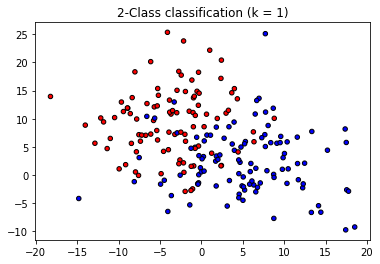

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split

from sklearn.metrics import (accuracy_score, f1_score, 
                             precision_score, recall_score,
                             classification_report, confusion_matrix)
n_neighbors = 1
n_neighbors = 20
n_classes = 2

n_neighbors = 1
# n_neighbors = 15
n_classes = 2
h = .1  # step size in the mesh

X, y = datasets.make_blobs(n_samples=200, n_features=2, centers=n_classes, cluster_std=4.0, random_state=42)

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


X, y = datasets.make_blobs(n_samples=200, n_features=2, centers=n_classes, cluster_std=6.0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(X_train, y_train)

y_pred = clf.predict(X)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=cmap_bold,
            edgecolor='k', s=20)
# plt.xlim(xx.min(), xx.max())
# plt.ylim(yy.min(), yy.max())
plt.title("%d-Class classification (k = %i)"
          % (n_classes, n_neighbors))
plt.show()

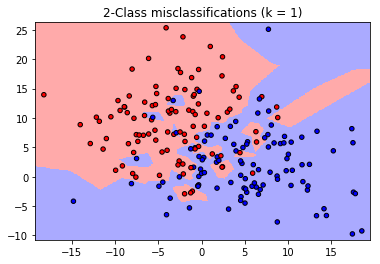

Performance on TEST data:
             precision    recall  f1-score   support

          0       0.94      0.82      0.88        39
          1       0.78      0.93      0.85        27

avg / total       0.88      0.86      0.86        66

[[32  7]
 [ 2 25]]
Performance on ALL data:
             precision    recall  f1-score   support

          0       0.98      0.93      0.95       100
          1       0.93      0.98      0.96       100

avg / total       0.96      0.95      0.95       200

[[93  7]
 [ 2 98]]


In [3]:
h = 0.1
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

#  Now let's plot misclassified samples.  
#
#  Note that we set the color parameter, c, to be the difference between y_pred and y.
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("%d-Class misclassifications (k = %i)"
          % (n_classes, n_neighbors))

plt.show()

#  And let's add a classification matrix...
print('Performance on TEST data:')
y_test_pred = clf.predict(X_test)
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

print('Performance on ALL data:')
y_pred = clf.predict(X)
print(classification_report(y, y_pred))
print(confusion_matrix(y, y_pred))

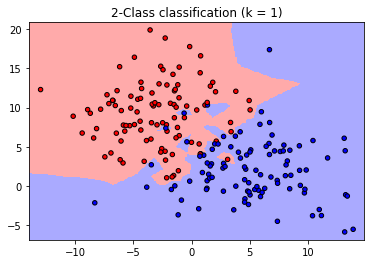

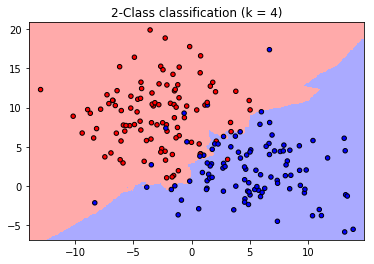

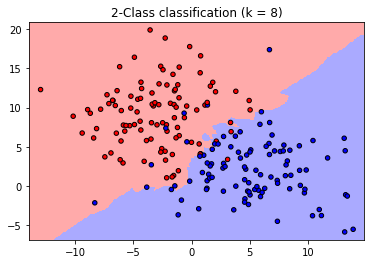

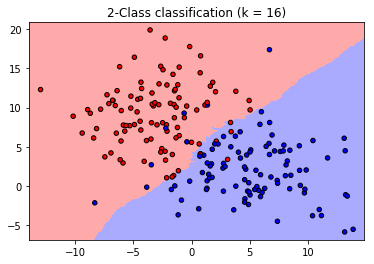

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 1
# n_neighbors = 15
n_classes = 2
h = .1  # step size in the mesh

X, y = datasets.make_blobs(n_samples=200, n_features=2, centers=n_classes, cluster_std=4.0, random_state=42)

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for n_neighbors in (1,4,8,16):
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("%d-Class classification (k = %i)"
              % (n_classes, n_neighbors))

plt.show()